# DSCI 303 - Homework 06
### Vincent Regazzi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Working with 2D Arrays

In [2]:
np.random.seed(seed = 1)
Z = np.random.uniform(low = 0, high = 10, size = 40).reshape(5, 8)
Z = np.round(Z, 2)
print(Z)

[[4.17 7.2  0.   3.02 1.47 0.92 1.86 3.46]
 [3.97 5.39 4.19 6.85 2.04 8.78 0.27 6.7 ]
 [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
 [8.76 8.95 0.85 0.39 1.7  8.78 0.98 4.21]
 [9.58 5.33 6.92 3.16 6.87 8.35 0.18 7.5 ]]


In [3]:
print(f'Row 3:    {Z[2, :]}')
print(f'Column 6: {Z[:, 5]}')

Row 3:    [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
Column 6: [0.92 8.78 9.68 8.78 8.35]


In [4]:
print(f'Row Sums:    {np.sum(Z, axis = 1)}')
print(f'Column Sums: {np.sum(Z, axis = 0)}')
print(f'Array Sum:   {np.sum(Z)}')

Row Sums:    [22.1  38.19 40.88 34.62 47.89]
Column Sums: [30.65 32.46 13.36 15.4  20.09 36.51  6.42 28.79]
Array Sum:   183.68


## Part 2: Reshaping and Stacking Arrays

In [5]:
np.random.seed(seed = 167)
x1 = np.random.normal(loc = 50, scale = 10, size = 1000).reshape(1000, 1)
x2 = np.random.normal(loc = 20, scale = 5, size = 1000).reshape(1000, 1)
x3 = np.random.normal(loc = 100, scale = 30, size = 1000).reshape(1000, 1)
x4 = np.random.normal(loc = 10, scale = 2, size = 1000).reshape(1000, 1)

X = np.hstack([x1, x2, x3, x4])
np.round(X, 2)
print(X.shape)

(1000, 4)


In [6]:
print(X[:6])

[[ 37.07861534  16.70853691 138.06044614   8.89178909]
 [ 41.31985946  19.9126036   99.60511238   9.85945795]
 [ 63.14543816  14.42551389  70.08374932  11.59527292]
 [ 50.03237101  12.710325    95.04906965   8.47301568]
 [ 55.04813593  24.39747547  62.15786392   9.48500489]
 [ 59.23662027  25.68452252  64.57283065  12.84442801]]


## Part 3: Standardization

In [7]:
Xmean = np.mean(X, axis = 0)
Xstd = np.std(X, axis = 0)
print(f'Column means:               {Xmean.round(2)}')
print(f'Column standard deviations: {Xstd.round(2)}')

Column means:               [50.21 19.86 99.84 10.06]
Column standard deviations: [ 9.69  5.08 30.88  2.03]


In [8]:
W = X - Xmean
W = W / Xstd
Wmean = np.mean(W, axis=0)
Wstd = np.std(W, axis=0)
print(f'Column means:               {Wmean.round(2)}')
print(f'Column standard deviations: {Wstd.round(2)}')

Column means:               [-0.  0. -0. -0.]
Column standard deviations: [1. 1. 1. 1.]


## Part 4: Load Auto MPG Dataset

In [9]:
auto = pd.read_table('auto_mpg.txt', sep = '\t')
auto.head(10)

,mpg,cyl,wt,region,model
0,27.2,4,3190,eur,peugeot 504
1,32.8,4,1985,asia,mazda glc deluxe
2,18.1,6,3410,usa,amc concord d/l
3,17.5,8,4080,usa,dodge magnum xe
4,25.4,5,3530,eur,mercedes benz 300d
5,31.0,4,1773,asia,toyota corolla 1200
6,27.4,4,2670,usa,amc spirit dl
7,39.1,4,1755,asia,toyota starlet
8,34.3,4,2188,eur,audi 4000
9,30.0,4,2155,usa,buick opel isuzu deluxe


In [10]:
print(auto.shape)

(398, 5)


In [11]:
print(auto.mean(numeric_only=True))

mpg      23.514573
cyl       5.454774
wt     2970.424623
dtype: float64


## Part 5: Regional Counts and Means

In [12]:
regions = np.unique(auto['region'])
print(regions)

['asia' 'eur' 'usa']


In [13]:
sel = (auto['region'] == 'asia')
asia_auto = auto[sel]
sel = (auto['region'] == 'eur')
eur_auto = auto[sel]
sel = (auto['region'] == 'usa')
usa_auto = auto[sel]

print(f'Number of cars manufactured in Asia:    {len(asia_auto)}')
print(f'Number of cars manufactured in Europe:  {len(eur_auto)}')
print(f'Number of cars manufactured in USA:    {len(usa_auto)}')

Number of cars manufactured in Asia:    79
Number of cars manufactured in Europe:  70
Number of cars manufactured in USA:    249


In [14]:
asia_means = asia_auto.mean(numeric_only=True, axis=0)
eur_means = eur_auto.mean(numeric_only=True, axis=0)
usa_means = usa_auto.mean(numeric_only=True, axis=0)

regionStack = np.vstack([asia_means, eur_means, usa_means])
mean_df = pd.DataFrame(regionStack, index=regions, columns=['mpg', 'cyl', 'wt'])
mean_df

,mpg,cyl,wt
asia,30.450633,4.101266,2221.227848
eur,27.891429,4.157143,2423.300000
usa,20.083534,6.248996,3361.931727


## Part 6: Average Weight and MPG by Region

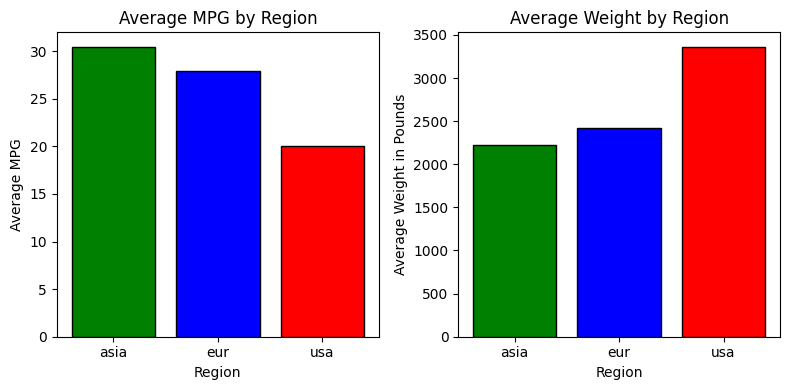

In [15]:
colors1 = ['green', 'blue', 'red']
plt.figure(figsize=[8, 4])
plt.subplot(1,2,1)
plt.bar(x = regions, height = mean_df['mpg'], color = colors1, edgecolor = 'black')
plt.title("Average MPG by Region")
plt.ylabel("Average MPG")
plt.xlabel("Region")

plt.subplot(1,2,2)
plt.bar(x = regions, height = mean_df['wt'], color = colors1, edgecolor = 'black')
plt.title("Average Weight by Region")
plt.ylabel("Average Weight in Pounds")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

## Part 7: Relationship between Weight and Miles Per Gallon

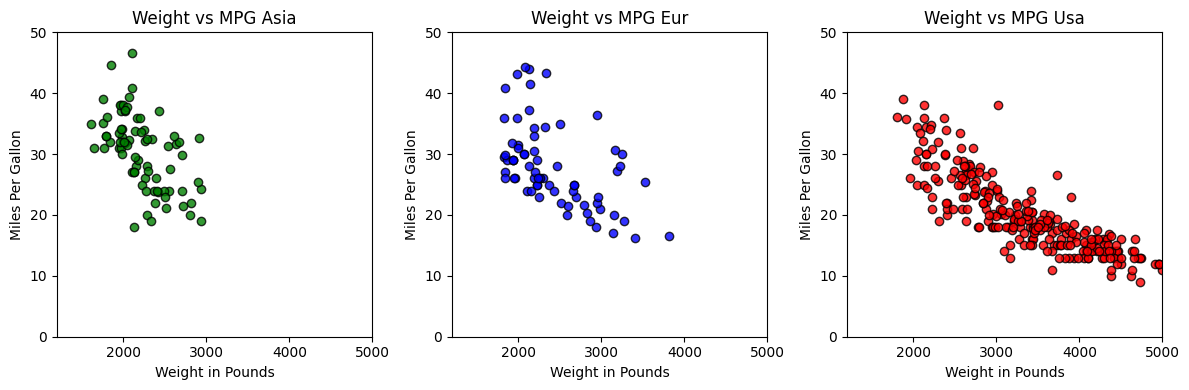

In [16]:
plt.figure(figsize=[12, 4])
for i in range(0, len(regions)):
    plt.subplot(1,3, i + 1)
    
    sel = (auto['region'] == regions[i])
    
    plt.scatter(x= auto['wt'][sel], y= auto['mpg'][sel], alpha=.8, color= colors1[i], edgecolor= 'black')
    
    plt.xlim([1200, 5000])
    plt.ylim([0, 50])
    plt.xlabel("Weight in Pounds")
    plt.ylabel("Miles Per Gallon")
    plt.title(f"Weight vs MPG {regions[i].capitalize()}")

plt.tight_layout()
plt.show()

## Part 8: Cylinder Distribution by Region

In [17]:
cyl_values = np.unique(auto['cyl'])
print(cyl_values)

[3 4 5 6 8]


In [18]:
cyl_counts_by_region = pd.crosstab(auto['cyl'], auto['region'])
cyl_counts_by_region

region,asia,eur,usa
cyl,,,
3,4,0,0
4,69,63,72
5,0,3,0
6,6,4,74
8,0,0,103


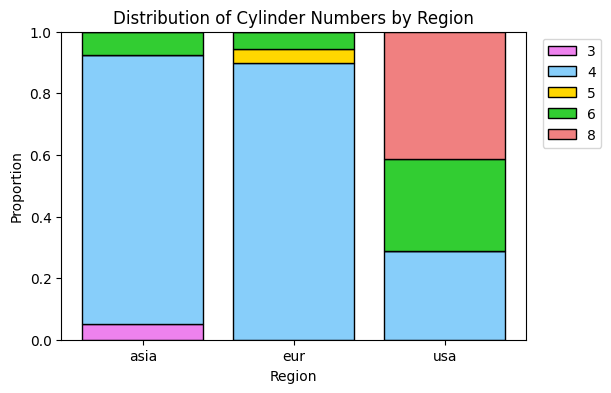

In [19]:
cyl_props_by_region = pd.DataFrame(cyl_counts_by_region / np.sum(cyl_counts_by_region, axis = 0))
bar_bottoms = np.cumsum(cyl_props_by_region) - cyl_props_by_region
colors2 = ['violet', 'lightskyblue', 'gold', 'limegreen', 'lightcoral']
plt.figure(figsize=[6,4])


for i in range(0, len(cyl_props_by_region)):
    plt.bar(label= cyl_values[i], x = regions, height= cyl_props_by_region.loc[cyl_values[i], : ], bottom= bar_bottoms.loc[cyl_values[i], : ], edgecolor='black', color = colors2[i])

plt.xlabel("Region")
plt.ylabel("Proportion")
plt.title("Distribution of Cylinder Numbers by Region")
plt.legend(bbox_to_anchor=(1.02, 1.0))


plt.show()